In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math

In [4]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [5]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


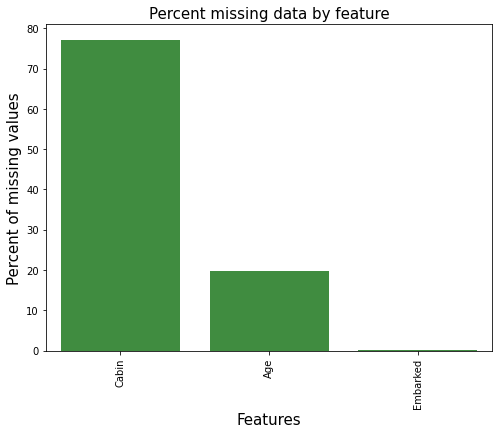

In [6]:
missingdata(train_df)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


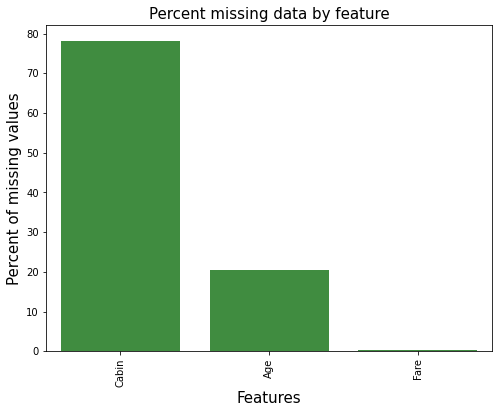

In [7]:
missingdata(test_df)

In [8]:
s_dic = {'male':1,'female':2}

train_df['Sex'] = train_df['Sex'].map(s_dic)

In [9]:
test_df['Sex'] = test_df['Sex'].map(s_dic)

In [10]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [11]:
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace = True)

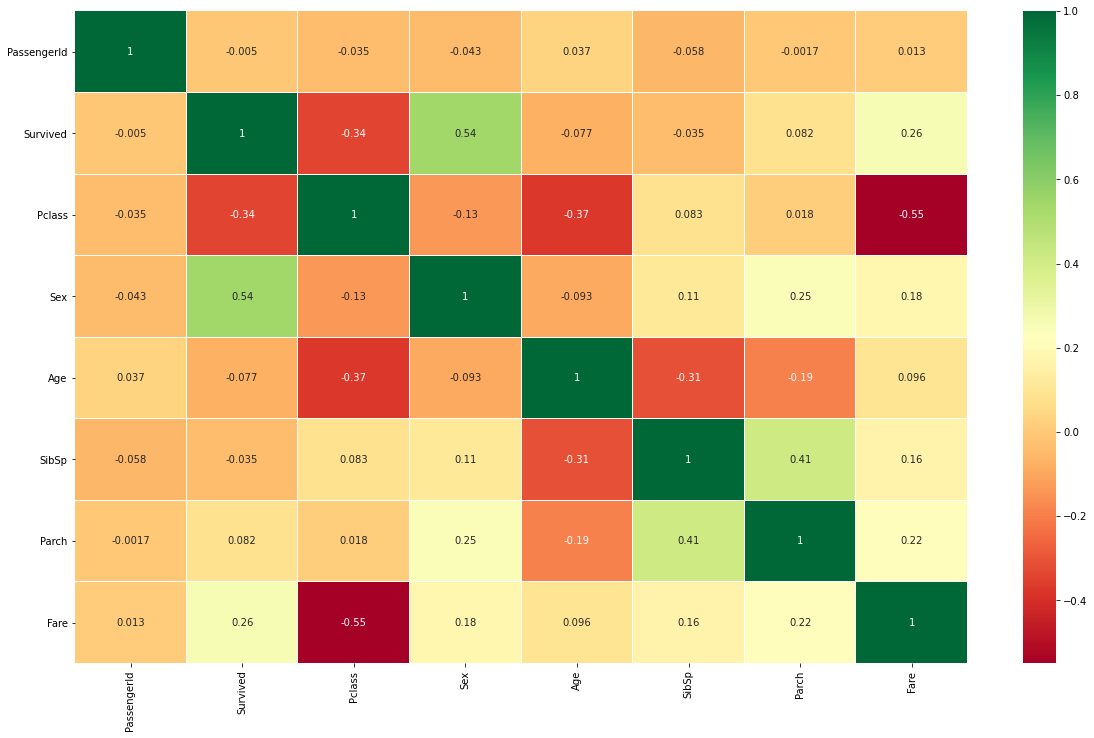

In [12]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=.02)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

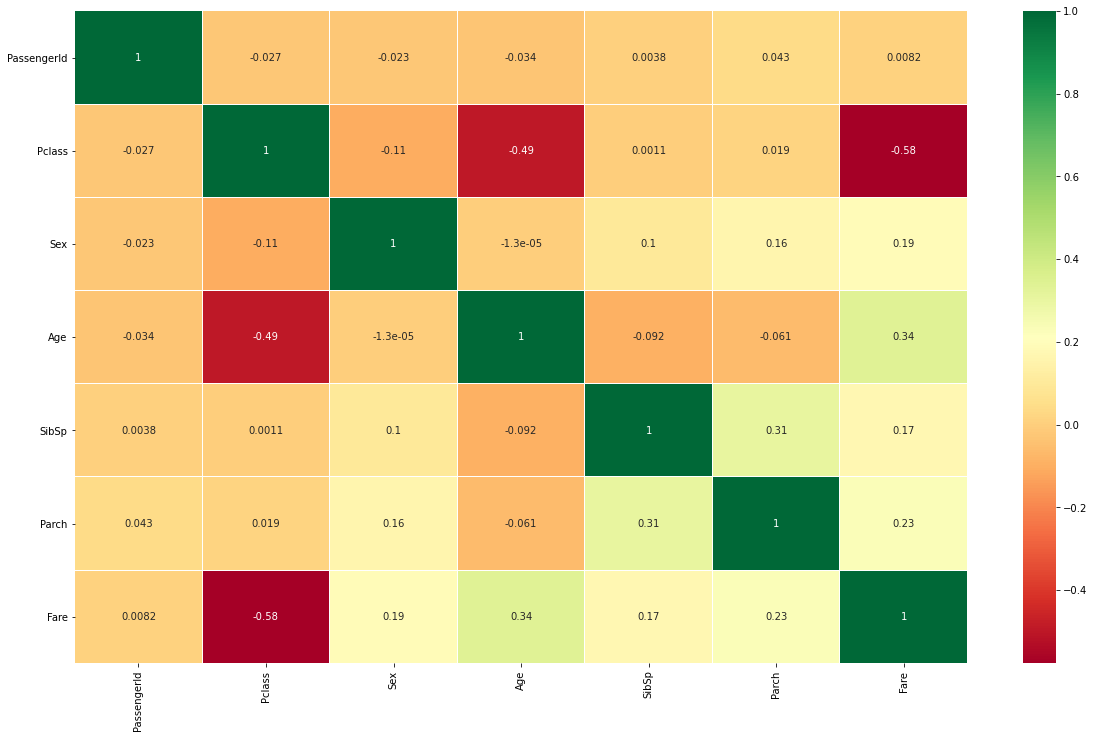

In [13]:
sns.heatmap(test_df.corr(),annot=True,cmap='RdYlGn',linewidths=.02)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [174]:
23/len(train_df[(train_df['Age'] < 18) & (train_df['Age'] > 10)])#['Survived'].sum()

0.46938775510204084

In [14]:
# Figure out how to fill N/A age

In [15]:
df_c = train_df.drop(columns=['Survived']).append(test_df).reset_index(drop=True)

In [16]:
df_c

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",2,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#### Fill in NA 

In [114]:
df_final = df_c[df_c['Age'].isna()==False]

In [112]:
df_na = df_c[df_c['Age'].isna()]

In [113]:
df_na

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,3,"Masselmani, Mrs. Fatima",2,NaN,0,0,2649,7.2250,NaN,C
26,27,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",2,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,3,"Riordan, Miss. Johanna Hannah""""",2,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,3,"Naughton, Miss. Hannah",2,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#remove people with ms from na, append to final df
df_final = df_final.append(mrs_df)

In [122]:
df_na = df_na[~df_na.index.isin(mrs_lst)]

In [123]:
df_na

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
26,27,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",2,NaN,0,0,330959,7.8792,NaN,Q
29,30,3,"Todoroff, Mr. Lalio",1,NaN,0,0,349216,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,3,"Riordan, Miss. Johanna Hannah""""",2,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,3,"Naughton, Miss. Hannah",2,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [149]:
#Replace First Class NA age with 39 (median), since none have parents or siblings aboard
df_final = df_final.append(fc_na)

In [152]:
df_na = df_na[~df_na.index.isin(fc_na.index)]

In [189]:
df_final = df_final.append(replace_na)

In [191]:
df_na = df_na[~df_na.index.isin(replace_na.index)]

In [206]:
df_final = df_final.append(na_sp_2)

In [213]:
df_na = df_na[~df_na.index.isin(na_sp_2.index)]

In [232]:
df_final = df_final.append(df_na)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",2,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
######################

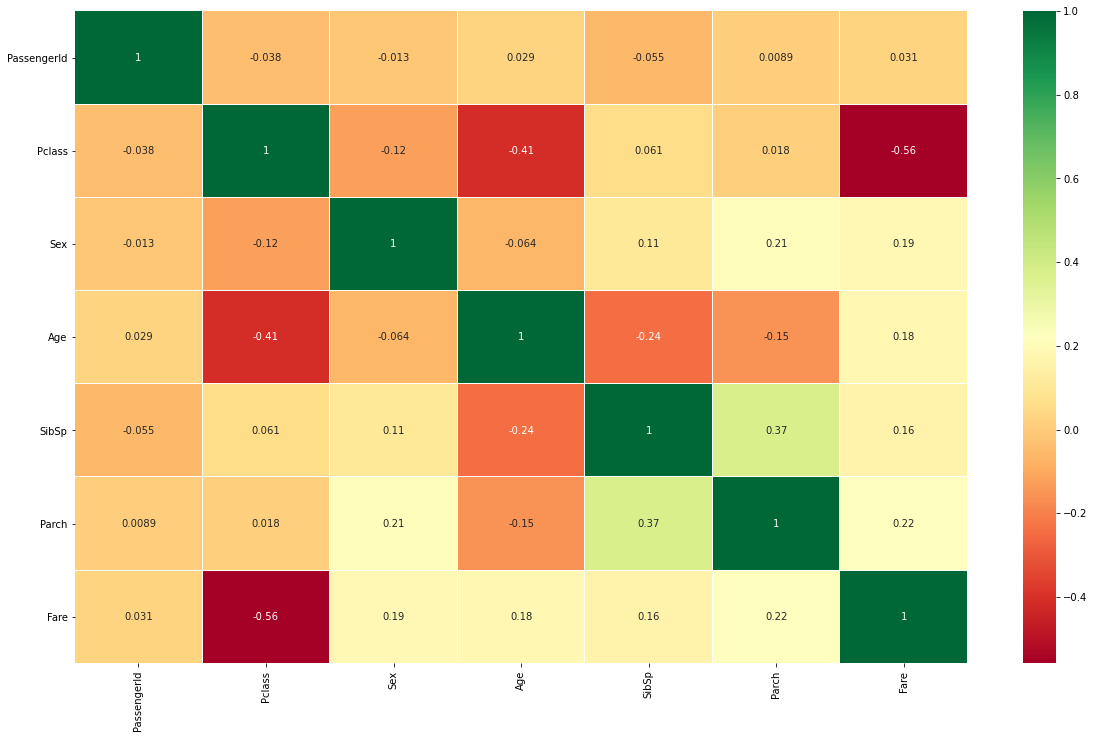

In [17]:
sns.heatmap(df_c.corr(),annot=True,cmap='RdYlGn',linewidths=.02)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [18]:
age_df = df_c[df_c['Age'].isna() == False]

In [19]:
age_df_na = df_c[df_c['Age'].isna()]

In [20]:
age_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,3,"Peacock, Miss. Treasteall",2,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1302,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",2,37.0,1,0,19928,90.0000,C78,Q
1303,1304,3,"Henriksson, Miss. Jenny Lovisa",2,28.0,0,0,347086,7.7750,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",2,39.0,0,0,PC 17758,108.9000,C105,C


In [21]:
age_df[age_df['Pclass'] ==1]['Age'].describe()

count    284.000000
mean      39.159930
std       14.548028
min        0.920000
25%       28.000000
50%       39.000000
75%       50.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
age_df[age_df['Pclass'].isin([2,3])]['Age'].describe()

count    762.000000
mean      26.422900
std       12.746265
min        0.170000
25%       19.000000
50%       25.000000
75%       33.000000
max       74.000000
Name: Age, dtype: float64

In [23]:
#children and adult

age_df_child = age_df[age_df['Age'] < 18]
age_df_adult = age_df[age_df['Age'] >= 18]

In [47]:
len(age_df_child[age_df_child['Pclass'] == 1])

15

In [48]:
15/154

0.09740259740259741

In [30]:
vc = df_c['Pclass'].value_counts()

In [35]:
vc

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [49]:
for v in vc:
    print(v,v/sum(vc),sum(vc))

709 0.5416348357524828 1309
323 0.24675324675324675 1309
277 0.21161191749427044 1309


In [72]:
age_df_child.describe()#['SibSp'].hist()#.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,610.798701,2.590909,1.467532,9.101753,1.389610,1.058442,31.577219
std,391.120117,0.662868,0.500573,6.015397,1.642219,0.785797,35.818273
min,8.000000,1.000000,1.000000,0.170000,0.000000,0.000000,3.170800
25%,244.000000,2.000000,1.000000,3.000000,0.000000,0.000000,12.334375
50%,627.000000,3.000000,1.000000,9.000000,1.000000,1.000000,21.075000
75%,938.500000,3.000000,2.000000,15.750000,2.000000,2.000000,34.031250
max,1301.000000,3.000000,2.000000,17.000000,8.000000,3.000000,262.375000


In [73]:
age_df_adult.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,891.000000
mean,663.056054,2.141256,1.354260,33.468610,0.349776,0.310538,37.569093
std,374.978639,0.851619,0.478557,12.244544,0.594466,0.799116,58.461348
min,1.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000
25%,338.750000,1.000000,1.000000,24.000000,0.000000,0.000000,8.050000
50%,665.500000,2.000000,1.000000,30.000000,0.000000,0.000000,14.454200
75%,982.500000,3.000000,2.000000,41.000000,1.000000,0.000000,36.125000
max,1307.000000,3.000000,2.000000,80.000000,4.000000,6.000000,512.329200


In [77]:
age_df_child[age_df_child['Pclass'] == 1].describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000
mean,643.200000,1.0,1.533333,12.128000,0.533333,1.266667,116.062220
std,312.215859,0.0,0.516398,5.888977,0.639940,0.883715,61.523141
min,298.000000,1.0,1.000000,0.920000,0.000000,0.000000,39.400000
25%,383.000000,1.0,1.000000,8.500000,0.000000,0.500000,69.918750
50%,551.000000,1.0,2.000000,15.000000,0.000000,2.000000,110.883300
75%,828.500000,1.0,2.000000,16.500000,1.000000,2.000000,143.025000
max,1295.000000,1.0,2.000000,17.000000,2.000000,2.000000,262.375000


In [97]:
age_df_adult[age_df_adult['Pclass'] == 1].describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,269.000000,269.0,269.000000,269.000000,269.000000,269.000000,269.000000
mean,686.446097,1.0,1.464684,40.667286,0.472119,0.364312,90.900388
std,374.510728,0.0,0.499681,13.360385,0.626054,0.713143,83.507769
min,2.000000,1.0,1.000000,18.000000,0.000000,0.000000,0.000000
25%,371.000000,1.0,1.000000,30.000000,0.000000,0.000000,32.320800
50%,691.000000,1.0,1.000000,39.000000,0.000000,0.000000,63.358300
75%,992.000000,1.0,2.000000,50.000000,1.000000,1.000000,106.425000
max,1306.000000,1.0,2.000000,80.000000,3.000000,4.000000,512.329200


In [98]:
age_df_child[age_df_child['Pclass'].isin([2,3])].describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,607.302158,2.762590,1.460432,8.775180,1.482014,1.035971,22.460132
std,399.483519,0.427034,0.500235,5.957937,1.691207,0.774691,13.373185
min,8.000000,2.000000,1.000000,0.170000,0.000000,0.000000,3.170800
25%,207.500000,3.000000,1.000000,3.000000,0.000000,0.000000,11.241700
50%,635.000000,3.000000,1.000000,9.000000,1.000000,1.000000,20.212500
75%,949.500000,3.000000,2.000000,15.000000,3.000000,2.000000,31.275000
max,1301.000000,3.000000,2.000000,17.000000,8.000000,3.000000,73.500000


In [86]:
age_df_adult[age_df_adult['Pclass'].isin([2,3])].describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,623.000000,623.000000,623.000000,623.000000,623.00000,623.000000,622.000000
mean,652.956661,2.634029,1.306581,30.360353,0.29695,0.287319,14.504594
std,375.029833,0.482088,0.461444,10.284525,0.57278,0.832972,11.126933
min,1.000000,2.000000,1.000000,18.000000,0.00000,0.000000,0.000000
25%,322.500000,2.000000,1.000000,22.250000,0.00000,0.000000,7.854200
50%,659.000000,3.000000,1.000000,28.000000,0.00000,0.000000,10.500000
75%,970.500000,3.000000,2.000000,35.500000,0.00000,0.000000,15.887500
max,1307.000000,3.000000,2.000000,74.000000,4.00000,6.000000,73.500000


In [94]:
for i in age_df_child.index:
    if 'mrs' in age_df_child['Name'][i].lower():
        print(age_df_child['Name'][i],age_df_child['Age'][i])

Nasser, Mrs. Nicholas (Adele Achem) 14.0
Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo) 17.0
Dick, Mrs. Albert Adrian (Vera Gillespie) 17.0
Yasbeck, Mrs. Antoni (Selini Alexander) 15.0
Thomas, Mrs. Alexander (Thamine Thelma")" 16.0


In [88]:
age_df_adult.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.0,0,2,347742,11.1333,NaN,S
11,12,1,"Bonnell, Miss. Elizabeth",2,58.0,0,0,113783,26.5500,C103,S
12,13,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,3,"Andersson, Mr. Anders Johan",1,39.0,1,5,347082,31.2750,NaN,S


In [91]:
mrs_lst = []
for i in age_df_na.index:
    if 'mrs' in age_df_na['Name'][i].lower():
        mrs_lst.append(i)

In [104]:
mrs_df = age_df_na[age_df_na.index.isin(mrs_lst)]

In [103]:
age_df[age_df['Sex'] == 2]['Age'].median()

27.0

In [106]:
df_na = age_df_na[~age_df_na.index.isin(mrs_lst)]

In [109]:
#use median female age for NAs with mrs. in name... (they're married)
mrs_df["Age"] = 27

In [110]:
mrs_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,3,"Masselmani, Mrs. Fatima",2,27,0,0,2649,7.2250,NaN,C
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",2,27,1,0,PC 17569,146.5208,B78,C
140,141,3,"Boulos, Mrs. Joseph (Sultana)",2,27,0,2,2678,15.2458,NaN,C
166,167,1,"Chibnall, Mrs. (Edith Martha Bowerman)",2,27,0,1,113505,55.0000,E33,S
186,187,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",2,27,1,0,370365,15.5000,NaN,Q
256,257,1,"Thorne, Mrs. Gertrude Maybelle",2,27,0,0,PC 17585,79.2000,NaN,C
334,335,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",2,27,1,0,PC 17611,133.6500,NaN,S
347,348,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",2,27,1,0,386525,16.1000,NaN,S
367,368,3,"Moussa, Mrs. (Mantoura Boulos)",2,27,0,0,2626,7.2292,NaN,C
375,376,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",2,27,1,0,PC 17604,82.1708,NaN,C


In [157]:
age_df_adult['SibSp'].value_counts(normalize=True)#.describe()

0    0.700673
1    0.260090
2    0.029148
3    0.008969
4    0.001121
Name: SibSp, dtype: float64

In [156]:
age_df_child['SibSp'].value_counts(normalize=True)

0    0.389610
1    0.311688
4    0.136364
2    0.064935
3    0.051948
5    0.038961
8    0.006494
Name: SibSp, dtype: float64

In [141]:
age_df[age_df['Pclass'] == 1]['Age'].mean()

39.15992957746479

In [124]:
df_na

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
26,27,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",2,NaN,0,0,330959,7.8792,NaN,Q
29,30,3,"Todoroff, Mr. Lalio",1,NaN,0,0,349216,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,3,"Riordan, Miss. Johanna Hannah""""",2,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,3,"Naughton, Miss. Hannah",2,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [130]:
df_na[(df_na['Pclass'] == 1) & (df_na['SibSp'] >1) & (df_na['Parch'] > 1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [142]:
fc_na = df_na[df_na['Pclass'] == 1]

In [147]:
fc_na['Age'] = 39

In [153]:
df_na

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
26,27,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",2,NaN,0,0,330959,7.8792,NaN,Q
29,30,3,"Todoroff, Mr. Lalio",1,NaN,0,0,349216,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,3,"Riordan, Miss. Johanna Hannah""""",2,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,3,"Naughton, Miss. Hannah",2,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [158]:
age_df_child['SibSp'].value_counts(normalize=True)

0    0.389610
1    0.311688
4    0.136364
2    0.064935
3    0.051948
5    0.038961
8    0.006494
Name: SibSp, dtype: float64

In [159]:
age_df_adult['SibSp'].value_counts(normalize=True)#.describe()

0    0.700673
1    0.260090
2    0.029148
3    0.008969
4    0.001121
Name: SibSp, dtype: float64

In [160]:
age_df_child['Parch'].value_counts(normalize=True)

1    0.402597
2    0.318182
0    0.272727
3    0.006494
Name: Parch, dtype: float64

In [161]:
age_df_adult['Parch'].value_counts(normalize=True)#.describe()

0    0.813901
1    0.109865
2    0.053812
3    0.007848
5    0.006726
4    0.005605
6    0.002242
Name: Parch, dtype: float64

In [168]:
age_df_child[(age_df_child['SibSp'] == 0) & (age_df_child['Parch'] == 0)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.0,0,0,350406,7.8542,NaN,S
22,23,3,"McGowan, Miss. Anna ""Annie""",2,15.0,0,0,330923,8.0292,NaN,Q
84,85,2,"Ilett, Miss. Bertha",2,17.0,0,0,SO/C 14885,10.5000,NaN,S
114,115,3,"Attalah, Miss. Malake",2,17.0,0,0,2627,14.4583,NaN,C
138,139,3,"Osen, Mr. Olaf Elon",1,16.0,0,0,7534,9.2167,NaN,S
156,157,3,"Gilnagh, Miss. Katherine ""Katie""",2,16.0,0,0,35851,7.7333,NaN,Q
163,164,3,"Calic, Mr. Jovo",1,17.0,0,0,315093,8.6625,NaN,S
208,209,3,"Carr, Miss. Helen ""Ellen""",2,16.0,0,0,367231,7.7500,NaN,Q
220,221,3,"Sunderland, Mr. Victor Francis",1,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
282,283,3,"de Pelsmaeker, Mr. Alfons",1,16.0,0,0,345778,9.5000,NaN,S


In [177]:
replace_na = df_na[(df_na['SibSp'] == 0) & (df_na['Parch'] == 0)]

In [182]:
replace_na['Age'] = 28

In [181]:
age_df['Age']

28.0

In [183]:
replace_na

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",1,28,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",1,28,0,0,244373,13.0000,NaN,S
26,27,3,"Emir, Mr. Farred Chehab",1,28,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",2,28,0,0,330959,7.8792,NaN,Q
29,30,3,"Todoroff, Mr. Lalio",1,28,0,0,349216,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1275,1276,2,"Wheeler, Mr. Edwin Frederick""""",1,28,0,0,SC/PARIS 2159,12.8750,NaN,S
1299,1300,3,"Riordan, Miss. Johanna Hannah""""",2,28,0,0,334915,7.7208,NaN,Q
1301,1302,3,"Naughton, Miss. Hannah",2,28,0,0,365237,7.7500,NaN,Q
1304,1305,3,"Spector, Mr. Woolf",1,28,0,0,A.5. 3236,8.0500,NaN,S


In [192]:
df_na

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,47,3,"Lennon, Mr. Denis",1,NaN,1,0,370371,15.5000,NaN,Q
48,49,3,"Samaan, Mr. Youssef",1,NaN,2,0,2662,21.6792,NaN,C
65,66,3,"Moubarek, Master. Gerios",1,NaN,1,1,2661,15.2458,NaN,C
109,110,3,"Moran, Miss. Bertha",2,NaN,1,0,371110,24.1500,NaN,Q
128,129,3,"Peter, Miss. Anna",2,NaN,1,1,2668,22.3583,F E69,C
159,160,3,"Sage, Master. Thomas Henry",1,NaN,8,2,CA. 2343,69.5500,NaN,S
176,177,3,"Lefebre, Master. Henry Forbes",1,NaN,3,1,4133,25.4667,NaN,S
180,181,3,"Sage, Miss. Constance Gladys",2,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,3,"Sage, Mr. Frederick",1,NaN,8,2,CA. 2343,69.5500,NaN,S
214,215,3,"Kiernan, Mr. Philip",1,NaN,1,0,367229,7.7500,NaN,Q


In [199]:
age_df[age_df['SibSp'] >2 ]['Age'].describe()

count    45.000000
mean     11.766667
std       9.686917
min       1.000000
25%       4.000000
50%       9.000000
75%      16.000000
max      38.000000
Name: Age, dtype: float64

In [201]:
na_sp_2 = df_na[df_na['SibSp'] >2] 

In [203]:
na_sp_2['Age'] = 9

In [204]:
na_sp_2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,3,"Sage, Master. Thomas Henry",1,9,8,2,CA. 2343,69.5500,NaN,S
176,177,3,"Lefebre, Master. Henry Forbes",1,9,3,1,4133,25.4667,NaN,S
180,181,3,"Sage, Miss. Constance Gladys",2,9,8,2,CA. 2343,69.5500,NaN,S
201,202,3,"Sage, Mr. Frederick",1,9,8,2,CA. 2343,69.5500,NaN,S
229,230,3,"Lefebre, Miss. Mathilde",2,9,3,1,4133,25.4667,NaN,S
324,325,3,"Sage, Mr. George John Jr",1,9,8,2,CA. 2343,69.5500,NaN,S
409,410,3,"Lefebre, Miss. Ida",2,9,3,1,4133,25.4667,NaN,S
485,486,3,"Lefebre, Miss. Jeannie",2,9,3,1,4133,25.4667,NaN,S
792,793,3,"Sage, Miss. Stella Anna",2,9,8,2,CA. 2343,69.5500,NaN,S
846,847,3,"Sage, Mr. Douglas Bullen",1,9,8,2,CA. 2343,69.5500,NaN,S


In [225]:
age_df[(age_df['SibSp']==2)&(age_df['Parch'] >0)]#['Age'].describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
147,148,3,"Ford, Miss. Robina Maggie ""Ruby""",2,9.00,2,2,W./C. 6608,34.3750,NaN,S
183,184,2,"Becker, Master. Richard F",1,1.00,2,1,230136,39.0000,F4,S
311,312,1,"Ryerson, Miss. Emily Borie",2,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
436,437,3,"Ford, Miss. Doolina Margaret ""Daisy""",2,21.00,2,2,W./C. 6608,34.3750,NaN,S
437,438,2,"Richards, Mrs. Sidney (Emily Hocking)",2,24.00,2,3,29106,18.7500,NaN,S
448,449,3,"Baclini, Miss. Marie Catherine",2,5.00,2,1,2666,19.2583,NaN,C
469,470,3,"Baclini, Miss. Helene Barbara",2,0.75,2,1,2666,19.2583,NaN,C
529,530,2,"Hocking, Mr. Richard George",1,23.00,2,1,29104,11.5000,NaN,S
600,601,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",2,24.00,2,1,243847,27.0000,NaN,S
618,619,2,"Becker, Miss. Marion Louise",2,4.00,2,1,230136,39.0000,F4,S


In [227]:
age_df[age_df['Pclass'] == 3]['Age'].describe()

count    501.000000
mean      24.816367
std       11.958202
min        0.170000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64

In [216]:
df_na[df_na['SibSp'] == 2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,49,3,"Samaan, Mr. Youssef",1,NaN,2,0,2662,21.6792,NaN,C
301,302,3,"McCoy, Mr. Bernard",1,NaN,2,0,367226,23.2500,NaN,Q
330,331,3,"McCoy, Miss. Agnes",2,NaN,2,0,367226,23.2500,NaN,Q
920,921,3,"Samaan, Mr. Elias",1,NaN,2,0,2662,21.6792,NaN,C
1018,1019,3,"McCoy, Miss. Alicia",2,NaN,2,0,367226,23.2500,NaN,Q
1188,1189,3,"Samaan, Mr. Hanna",1,NaN,2,0,2662,21.6792,NaN,C


In [228]:
df_na['Age'] = 24

In [229]:
df_na

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,47,3,"Lennon, Mr. Denis",1,24,1,0,370371,15.5000,NaN,Q
48,49,3,"Samaan, Mr. Youssef",1,24,2,0,2662,21.6792,NaN,C
65,66,3,"Moubarek, Master. Gerios",1,24,1,1,2661,15.2458,NaN,C
109,110,3,"Moran, Miss. Bertha",2,24,1,0,371110,24.1500,NaN,Q
128,129,3,"Peter, Miss. Anna",2,24,1,1,2668,22.3583,F E69,C
214,215,3,"Kiernan, Mr. Philip",1,24,1,0,367229,7.7500,NaN,Q
240,241,3,"Zabour, Miss. Thamine",2,24,1,0,2665,14.4542,NaN,C
241,242,3,"Murphy, Miss. Katherine ""Kate""",2,24,1,0,367230,15.5000,NaN,Q
301,302,3,"McCoy, Mr. Bernard",1,24,2,0,367226,23.2500,NaN,Q
330,331,3,"McCoy, Miss. Agnes",2,24,2,0,367226,23.2500,NaN,Q


In [233]:
########################## Age fill in DONE ############

In [240]:
df_final1 = df_final.drop(columns = ['Cabin','Fare','Ticket','Name'])

In [241]:
df_final1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1,22.0,1,0,S
1,2,1,2,38.0,1,0,C
2,3,3,2,26.0,0,0,S
3,4,1,2,35.0,1,0,S
4,5,3,1,35.0,0,0,S
...,...,...,...,...,...,...,...
1188,1189,3,1,24.0,2,0,C
1233,1234,3,1,24.0,1,9,S
1235,1236,3,1,24.0,1,1,S
1257,1258,3,1,24.0,1,0,C


In [243]:
df_train = df_final1[df_final1['PassengerId'].isin(train_df['PassengerId'])] 

In [248]:
df_train.sort_values('PassengerId',inplace=True)

In [249]:
train_df.sort_values('PassengerId',inplace=True)

In [252]:
df_train['Survived'] = train_df['Survived']

In [255]:
df_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,1,22.0,1,0,S,0
1,2,1,2,38.0,1,0,C,1
2,3,3,2,26.0,0,0,S,1
3,4,1,2,35.0,1,0,S,1
4,5,3,1,35.0,0,0,S,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,S,0
887,888,1,2,19.0,0,0,S,1
888,889,3,2,24.0,1,2,S,0
889,890,1,1,26.0,0,0,C,1


In [256]:
e_dic = {'S':1,'C':2,'Q':3}

In [258]:
df_train['Embarked'] = df_train['Embarked'].map(e_dic)

In [259]:
df_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,1,22.0,1,0,1,0
1,2,1,2,38.0,1,0,2,1
2,3,3,2,26.0,0,0,1,1
3,4,1,2,35.0,1,0,1,1
4,5,3,1,35.0,0,0,1,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,1,0
887,888,1,2,19.0,0,0,1,1
888,889,3,2,24.0,1,2,1,0
889,890,1,1,26.0,0,0,2,1


In [ ]:
oh_cols_train = pd.DataFrame(OH_encorder.fit_transform(df_train[['Embarked','Sex']]))
df_train1 = df_train.drop(columns=['Sex','Embarked'])
df_train2 = pd.concat([df_train1,oh_cols_train],axis=1)

In [260]:
from sklearn.preprocessing import OneHotEncoder

In [266]:
OH_encorder = OneHotEncoder(sparse=False)

In [271]:
oh_cols_train = pd.DataFrame(OH_encorder.fit_transform(df_train[['Embarked','Sex']]))

In [269]:
df_train1 = df_train.drop(columns=['Sex','Embarked'])

In [273]:
df_train2 = pd.concat([df_train1,oh_cols_train],axis=1)

In [281]:
df_train3 = df_train2.copy()

In [282]:
df_train3

,PassengerId,Pclass,Age,SibSp,Parch,Survived,0,1,2,3,4
0,1,3,22.0,1,0,0,1.0,0.0,0.0,1.0,0.0
1,2,1,38.0,1,0,1,0.0,1.0,0.0,0.0,1.0
2,3,3,26.0,0,0,1,1.0,0.0,0.0,0.0,1.0
3,4,1,35.0,1,0,1,1.0,0.0,0.0,0.0,1.0
4,5,3,35.0,0,0,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,0,1.0,0.0,0.0,1.0,0.0
887,888,1,19.0,0,0,1,1.0,0.0,0.0,0.0,1.0
888,889,3,24.0,1,2,0,1.0,0.0,0.0,0.0,1.0
889,890,1,26.0,0,0,1,0.0,1.0,0.0,1.0,0.0


In [283]:
for i in df_train3.index:
    if df_train3['Age'][i] < 8:
        df_train3['Age'][i] = 1
    elif df_train3['Age'][i] >= 8 and df_train3['Age'][i] < 18:
        df_train3['Age'][i] = 2
    elif df_train3['Age'][i] >= 18 and df_train3['Age'][i] < 59:
        df_train3['Age'][i] = 3
    elif df_train3['Age'][i] >= 59:
        df_train3['Age'][i] = 4

In [291]:
df_train4 = df_train3.drop(columns=['PassengerId'])

In [318]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = df_train4.drop("Survived",axis=1)
Targeted_feature = df_train4["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 9), (268, 9), (623,), (268,))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 79.85
The cross validated score for Logistic REgression is: 80.36


Text(0.5, 1.05, 'Confusion_matrix')

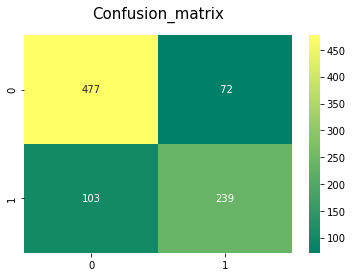

In [293]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 79.85
The cross validated score for Random Forest Classifier is: 82.5


Text(0.5, 1.05, 'Confusion_matrix')

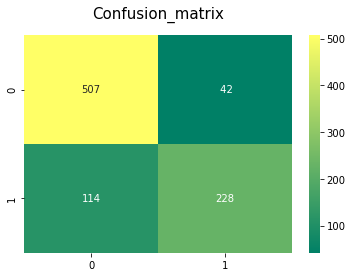

In [294]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 82.46
The cross validated score for Support Vector Machines Classifier is: 82.72


Text(0.5, 1.05, 'Confusion_matrix')

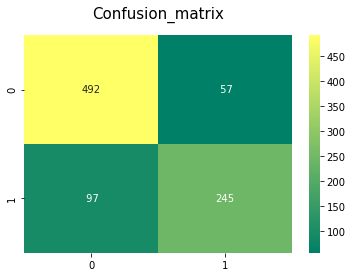

In [295]:
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 80.97
The cross validated score for K Nearest Neighbors Classifier is: 81.48


Text(0.5, 1.05, 'Confusion_matrix')

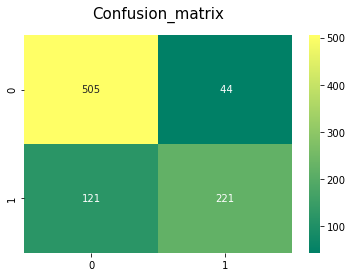

In [296]:
##knn
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 77.61
The cross validated score for Gaussian Naive Bayes classifier is: 79.8


Text(0.5, 1.05, 'Confusion_matrix')

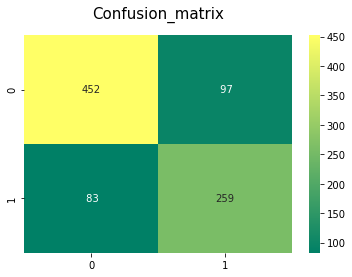

In [297]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 80.6
The cross validated score for Decision Tree classifier is: 80.93


Text(0.5, 1.05, 'Confusion_matrix')

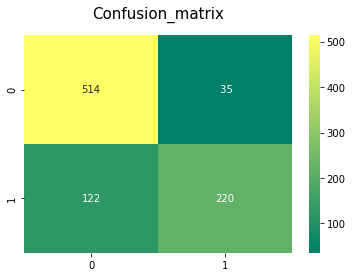

In [298]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 80.97
The cross validated score for AdaBoostClassifier is: 80.02


Text(0.5, 1.05, 'Confusion_matrix')

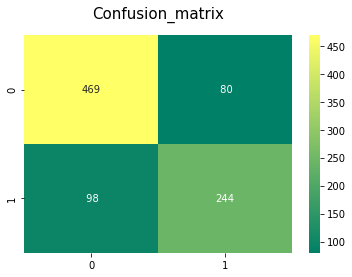

In [303]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the LinearDiscriminantAnalysis is 80.22
The cross validated score for AdaBoostClassifier is: 80.13


Text(0.5, 1.05, 'Confusion_matrix')

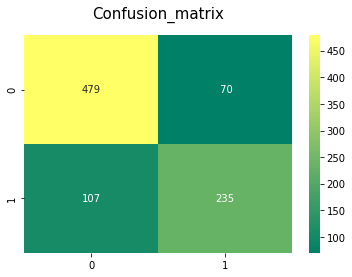

In [301]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the LinearDiscriminantAnalysis is',round(accuracy_score(prediction_lda,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lda=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 79.1
The cross validated score for AdaBoostClassifier is: 82.49


Text(0.5, 1.05, 'Confusion_matrix')

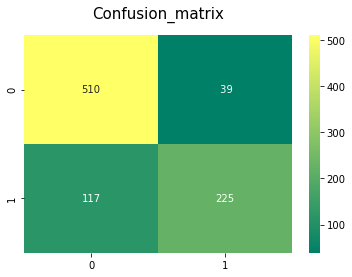

In [302]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [304]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis', 
              'Decision Tree'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(), 
              result_rm.mean(), result_gnb.mean(), result_adb.mean(), 
              result_gbc.mean(), result_lda.mean(), result_tree.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Support Vector Machines,0.827166
3,Random Forest,0.824981
6,Gradient Decent,0.824944
1,KNN,0.814831
8,Decision Tree,0.809251
2,Logistic Regression,0.803608
7,Linear Discriminant Analysis,0.801336
5,AdaBoostClassifier,0.800237
4,Naive Bayes,0.797990


In [322]:
all_features = df_train4.drop("Survived",axis=1)
Targeted_feature = df_train4["Survived"]
train_X,test_X,train_y,test_y = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [319]:
train_X = X_train
train_Y= y_train
test_X  = X_test
test_y = y_test
train_X.shape, train_Y.shape, test_X.shape

((623, 9), (623,), (268, 9))

In [321]:
train_Y

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

In [323]:
# Gradient boosting tunning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(train_X,train_Y)

# Best score
modelf.best_score_

# Best Estimator
modelf.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 556 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 1556 tasks      | elapsed:   24.1s
[Parallel(n_jobs=4)]: Done 1913 out of 1920 | elapsed:   29.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:   29.4s finished


GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300)

In [324]:
modelf.best_score_

0.8122119815668203

In [309]:
# Random Forest Classifier Parameters tunning 
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    5.7s remaining:    1.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    7.2s finished


0.7778984370096039


RandomForestClassifier(n_estimators=200)

In [310]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model =LinearDiscriminantAnalysis()
param_grid = {'tol':[0.001,0.01,.1,.2]}

modell = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modell.fit(train_X,train_Y)

# Best score
print(modell.best_score_)

# Best Estimator
modell.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.7912434875400163


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


LinearDiscriminantAnalysis(tol=0.001)

In [317]:
# model= SVC()
# param_grid = {'kernel': ['rbf','linear'], 
#                   'gamma': [ 0.001, 0.01, 0.1, 1],
#                   'C': [1, 10, 50, 100,200,300, 1000]}

# modelsvm = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

# modelsvm.fit(train_X,train_Y)

# print(modelsvm.best_estimator_)

# # Best score
# print(modelsvm.best_score_)

Important features
____________________________________________________________
87.16


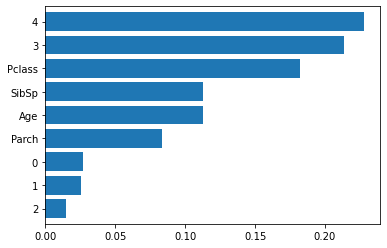

In [328]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(test_X,test_y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [351]:
train_X

,Pclass,Age,SibSp,Parch,0,1,2,3,4
445,1,1.0,0,2,1.0,0.0,0.0,1.0,0.0
650,3,3.0,0,0,1.0,0.0,0.0,1.0,0.0
172,3,1.0,1,1,1.0,0.0,0.0,0.0,1.0
450,2,3.0,1,2,1.0,0.0,0.0,1.0,0.0
314,2,3.0,1,1,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
106,3,3.0,0,0,1.0,0.0,0.0,0.0,1.0
270,1,3.0,0,0,1.0,0.0,0.0,1.0,0.0
860,3,3.0,2,0,1.0,0.0,0.0,1.0,0.0
435,1,2.0,1,2,1.0,0.0,0.0,0.0,1.0


In [326]:
random_forest.predict()

87.16

In [330]:
###########

In [329]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",2,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [333]:
df_submission = df_final1[df_final1['PassengerId'].isin(test_df['PassengerId'])]

In [334]:
df_submission

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
891,892,3,1,34.5,0,0,Q
892,893,3,2,47.0,1,0,S
893,894,2,1,62.0,0,0,Q
894,895,3,1,27.0,0,0,S
895,896,3,2,22.0,1,1,S
...,...,...,...,...,...,...,...
1188,1189,3,1,24.0,2,0,C
1233,1234,3,1,24.0,1,9,S
1235,1236,3,1,24.0,1,1,S
1257,1258,3,1,24.0,1,0,C


In [335]:
e_dic = {'S':1,'C':2,'Q':3}

In [337]:
df_submission['Embarked'] = df_submission['Embarked'].map(e_dic)

In [345]:
df_submission.reset_index(drop=True,inplace=True)

In [346]:
OH_encorder = OneHotEncoder(sparse=False)

In [347]:
oh_cols_train = pd.DataFrame(OH_encorder.fit_transform(df_submission[['Embarked','Sex']]))
df_submission1 = df_submission.drop(columns=['Sex','Embarked'])
df_submission2 = pd.concat([df_submission1,oh_cols_train],axis=1)

In [350]:
df_submission2

,PassengerId,Pclass,Age,SibSp,Parch,0,1,2,3,4
0,892,3,3.0,0,0,0.0,0.0,1.0,1.0,0.0
1,893,3,3.0,1,0,1.0,0.0,0.0,0.0,1.0
2,894,2,4.0,0,0,0.0,0.0,1.0,1.0,0.0
3,895,3,3.0,0,0,1.0,0.0,0.0,1.0,0.0
4,896,3,3.0,1,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,1189,3,3.0,2,0,0.0,1.0,0.0,1.0,0.0
414,1234,3,3.0,1,9,1.0,0.0,0.0,1.0,0.0
415,1236,3,3.0,1,1,1.0,0.0,0.0,1.0,0.0
416,1258,3,3.0,1,0,0.0,1.0,0.0,1.0,0.0


In [349]:
for i in df_submission2.index:
    if df_submission2['Age'][i] < 8:
        df_submission2['Age'][i] = 1
    elif df_submission2['Age'][i] >= 8 and df_submission2['Age'][i] < 18:
        df_submission2['Age'][i] = 2
    elif df_submission2['Age'][i] >= 18 and df_submission2['Age'][i] < 59:
        df_submission2['Age'][i] = 3
    elif df_submission2['Age'][i] >= 59:
        df_submission2['Age'][i] = 4

In [353]:
df_submission3 = df_submission2.drop(columns=['PassengerId'])

In [354]:
df_submission3

,Pclass,Age,SibSp,Parch,0,1,2,3,4
0,3,3.0,0,0,0.0,0.0,1.0,1.0,0.0
1,3,3.0,1,0,1.0,0.0,0.0,0.0,1.0
2,2,4.0,0,0,0.0,0.0,1.0,1.0,0.0
3,3,3.0,0,0,1.0,0.0,0.0,1.0,0.0
4,3,3.0,1,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,3.0,2,0,0.0,1.0,0.0,1.0,0.0
414,3,3.0,1,9,1.0,0.0,0.0,1.0,0.0
415,3,3.0,1,1,1.0,0.0,0.0,1.0,0.0
416,3,3.0,1,0,0.0,1.0,0.0,1.0,0.0


In [356]:
preds = random_forest.predict(df_submission3)

In [358]:
df_submission2['Pred'] = preds

In [359]:
df_submission2

,PassengerId,Pclass,Age,SibSp,Parch,0,1,2,3,4,Pred
0,892,3,3.0,0,0,0.0,0.0,1.0,1.0,0.0,0
1,893,3,3.0,1,0,1.0,0.0,0.0,0.0,1.0,0
2,894,2,4.0,0,0,0.0,0.0,1.0,1.0,0.0,0
3,895,3,3.0,0,0,1.0,0.0,0.0,1.0,0.0,0
4,896,3,3.0,1,1,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1189,3,3.0,2,0,0.0,1.0,0.0,1.0,0.0,0
414,1234,3,3.0,1,9,1.0,0.0,0.0,1.0,0.0,0
415,1236,3,3.0,1,1,1.0,0.0,0.0,1.0,0.0,0
416,1258,3,3.0,1,0,0.0,1.0,0.0,1.0,0.0,0


In [360]:
df_submission_final = df_submission2[['PassengerId','Pred']]

In [362]:
df_submission_final.to_csv('submission1.csv',index=False)